## Instantiating the a small convnet 
#### convnet is a stack of Conv2D(with relu activation) and MaxPooling2D layers

In [2]:
from keras import layers
from keras import models

C:\Users\Ros\Anaconda3\envs\face\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Configuring the model for training (compilation step)

In [5]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
              metrics = ['acc'] )

# Data preprocessing uisng data generator

In [6]:
import os
os.getcwd()

'C:\\Users\\Ros\\Desktop\\Gnanesh\\Deep Learning with Keras'

In [7]:
train_dir = 'C:\\Users\\Ros\\Desktop\\Gnanesh\\Deep Learning with Keras\\dogs_vs_cats_small\\train'
validation_dir = 'C:\\Users\\Ros\\Desktop\\Gnanesh\\Deep Learning with Keras\\dogs_vs_cats_small\\validation'

In [8]:
from keras.preprocessing.image import ImageDataGenerator

#rescale all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255,
                                  )
test_datagen = ImageDataGenerator(rescale=1./255)


In [9]:
train_generator = train_datagen.flow_from_directory(train_dir, #Target directory
                                                       target_size=(150,150), #resizes all images to 150x150
                                                       batch_size = 20,
                                                       class_mode = 'binary') #because we use binary_crossentropy loss, we need binary lables


Found 2000 images belonging to 2 classes.


In [10]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size = 20,
                                                       class_mode = 'binary')

Found 1000 images belonging to 2 classes.


printing the shapes of the datas

In [12]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


## Fitting the model using a batch generator

In [15]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 100, #20*100 = 2000
                             epochs = 30,
                             validation_data = validation_generator,
                             validation_steps = 50) #(batch_size*steps_per_epoch = number of samples in validation)

Epoch 1/30
100/100 [==============================] - 9s 87ms/step - loss: 0.6898 - acc: 0.5295 - val_loss: 0.6741 - val_acc: 0.6170
Epoch 2/30
100/100 [==============================] - 6s 59ms/step - loss: 0.6593 - acc: 0.6060 - val_loss: 0.6739 - val_acc: 0.5610
Epoch 3/30
100/100 [==============================] - 6s 59ms/step - loss: 0.6140 - acc: 0.6590 - val_loss: 0.6122 - val_acc: 0.6790
Epoch 4/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5707 - acc: 0.7095 - val_loss: 0.5876 - val_acc: 0.6970
Epoch 5/30
100/100 [==============================] - 6s 60ms/step - loss: 0.5356 - acc: 0.7350 - val_loss: 0.5775 - val_acc: 0.6960
Epoch 6/30
100/100 [==============================] - 6s 59ms/step - loss: 0.5103 - acc: 0.7480 - val_loss: 0.5841 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 6s 61ms/step - loss: 0.4804 - acc: 0.7775 - val_loss: 0.5869 - val_acc: 0.6820
Epoch 8/30
100/100 [==============================] - 6s 59ms/step - 

## Saving the model

In [16]:
model.save('dogs_vs_cats_small_1.h5')

In [20]:
history.history

{'val_loss': [0.6741298496723175,
  0.6738911783695221,
  0.6122048509120941,
  0.5875696897506714,
  0.5775174087285996,
  0.5841072392463684,
  0.5868837571144104,
  0.6666035509109497,
  0.5424906599521637,
  0.6066842931509018,
  0.5301450115442276,
  0.5817541396617889,
  0.618617028594017,
  0.6029600256681442,
  0.549080211520195,
  0.5634907284379005,
  0.5864907360076904,
  0.6159821909666061,
  0.6135285276174546,
  0.6673487672209739,
  0.6275137989223003,
  0.7554629257321358,
  0.7444675284624099,
  0.7445787179470063,
  0.7343503764271736,
  0.8771575450897217,
  0.7738277933001518,
  0.8720182144641876,
  0.9467032441496849,
  0.8918393160402774],
 'val_acc': [0.6169999992847442,
  0.5610000032186508,
  0.6790000063180923,
  0.6969999980926513,
  0.6959999990463257,
  0.68799999833107,
  0.6820000004768372,
  0.6419999998807907,
  0.7150000023841858,
  0.7110000002384186,
  0.7360000014305115,
  0.7050000023841858,
  0.7270000004768371,
  0.7300000035762787,
  0.73500000

## Displaying the loss and accuracy during training

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

<Figure size 432x288 with 0 Axes>

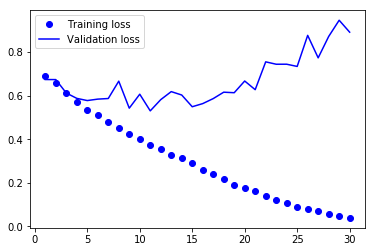

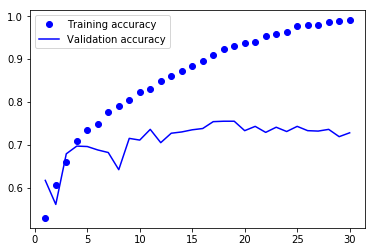

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(epochs,loss, 'bo', label = 'Training loss')
plt.plot(epochs,val_loss, 'b', label = 'Validation loss')
plt.legend()
plt.figure()

plt.plot(epochs,acc, 'bo', label = 'Training accuracy')
plt.plot(epochs,val_acc, 'b', label = 'Validation accuracy')
plt.legend()
plt.figure()